# Homework 03 - Nonstandard Evaluation and Git

## Nonstandard Evaluation


### Question 1
Imagine we have a data frame called `data`, with a `type` column. Which one works and why?\
Function 1:
```
group_and_tally <- function(df, column){
    df %>% group_by({{ column }}) %>% tally();
}
group_and_tally(data, type);
```

Function 2:
```
group_and_tally <- function(df, column){
    df %>% group_by(column) %>% tally();
}
group_and_tally(data, type);
```

Function 1 works because the {{}} around column tells R to treat it as column name instead of as a string.

## Git
For the questions below, please add the commands you used to complete these steps.

### Question 2
Set up your git repo on your local computer. If you already make a git repo on GitHub, but it isn’t on your local computer - clone it.

git clone https://github.com/rvijay04/512-repo.git/

cd 512-repo

### Question 3
Set up your SSH key.

ssh-keygen -t ed25519 -C "rvijay@unc.edu"

pbcopy < ~/.ssh/id_ed25519.pub

### Question 4
a) Add a HW2 directory to your git repo through the terminal with a HW.md file that says "This is for homework 2."


mkdir HW2

echo "This is for homework 2" > HW2/HW2.md

b) *Add* HW2.md to the staging area. Then, use the command to see which files have been modified, staged for commit, or are untracked. What does it show?
They should copy paste the terminal response after git status, and show that key used the commands below.

git add HW2/HW2.md

git status

On branch main
Your branch is ahead of 'origin/main' by 1 commit.
  (use "git push" to publish your local commits)

Changes to be committed:
  (use "git restore --staged <file>..." to unstage)
	new file:   HW2/HW2.md

c) Save file changes to the main branch.

git commit -m "Add HW2.md for homework 2"

d) Now, edit the HW2.md file to give it a  title.

echo "# Homework 2" > HW2/HW2.md

e) Use the command that compares current, unsaved changes to the main branch. What does it say?\
\
f) Use the command that checks the status of the working directory and the staging area *again*. What does it say?\
\
g) Once again, add HW2.md to the staging area and save the file changes to the main branch. Then, get use the command that gives you project history and paste the output in your homework.

e response) command: git diff
printout: diff --git a/HW2/HW2.md b/HW2/HW2.md
index 6dbdf24..e4e6b4d 100644
--- a/HW2/HW2.md
+++ b/HW2/HW2.md
@@ -1 +1 @@
-This is for homework 2
+# Homework 2

f response) command: git status
printout: On branch main
Your branch is ahead of 'origin/main' by 2 commits.
  (use "git push" to publish your local commits)

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   HW2/HW2.md

g response: command for project history: git log
printout: commit 8ae4f9834b15ba396db5ba2d6e1d31979a55953f (HEAD -> main)
Author: Rachitha Vijay <rachithavijay@Rachithas-MacBook-Pro-4.local>
Date:   Thu Sep 11 12:13:22 2025 -0400

    Added title to the file

commit 77f1ab66cb34959da8d036ca7b6f0ec17fcaa129
Author: Rachitha Vijay <rachithavijay@Rachithas-MacBook-Pro-4.local>
Date:   Thu Sep 11 11:43:59 2025 -0400

    Add HW2.md for homework 2

commit c08905d59779ae411412a5f0fb094ae3f73af4f8
Author: Rachitha Vijay <rachithavijay@Rachithas-MacBook-Pro-4.local>
Date:   Tue Sep 9 07:04:56 2025 -0400

    Add HW2 directory with BIOS512_HW3.ipynb for HW 2

commit 6d19771741a09f9d1f6b5fe723dc38a3616fa05c (origin/main)
Author: Rachitha Vijay <rachithavijay@Rachithas-MacBook-Pro-4.local>
Date:   Thu Aug 28 09:39:18 2025 -0400

    initial commit
:




h) Do some searching... What `git` command will provide you documentation on other commands? Use that command to find documentation on `git log` and `git show`. What does `--since` mean in regards to `git log`? Copy and paste what is written in the documentation.

git help log and git help show are the two commands that would help find documentation on git log and git show.  

--since=<date>, --after=<date>
           Show commits more recent than a specific date.

## Tidyverse

Note: Please make sure Binder is set up correctly to run this section. You can follow the instructions here: https://github.com/rjenki/BIOS512.

**Please show your code for this section!** Before completing this section, please run the following.

In [111]:
library(tidyverse)
if (!dir.exists("intermediate")) dir.create("intermediate", recursive = TRUE)
if (!exists("mdpre")) mdpre <- function(x) { print(x) }
if (!exists("ggmd"))  ggmd  <- function(p) { print(p) }

### Question 5

Download the patient_names.csv and patient_properties.csv files from Canvas and read them into R. Manually set the date columns to be date variables. Print the first 10 observations of each.

In [112]:
patient_names <- read.csv("/content/patient_names.csv")

head(patient_names, 10)

fix_bd <- function(x) {
  x <- as.Date(x, format = "%m/%d/%y")
  x <- if_else(!is.na(x) & x > as.Date("2020-01-01"),
               x - years(100),
               x)
  return(x)
}

patient_names <- patient_names %>%
  mutate(
    BIRTHDATE = fix_bd(BIRTHDATE),
    DEATHDATE = as.Date(DEATHDATE, format = "%m/%d/%y")
  )

,ID,BIRTHDATE,DEATHDATE,FIRST,LAST,CITY,STATE
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,5605b66b-e92d-c16c-1b83-b8bf7040d51f,3/19/77,NA,Nikita578,Erdman779,Quincy,Massachusetts
2,6e5ae27c-8038-7988-e2c0-25a103f01bfa,2/19/40,NA,Zane918,Hodkiewicz467,Boston,Massachusetts
3,8123d076-0886-9007-e956-d5864aa121a7,6/4/58,NA,Quinn173,Marquardt819,Quincy,Massachusetts
4,770518e4-6133-648e-60c9-071eb2f0e2ce,12/25/28,9/29/17,Abel832,Smitham825,Boston,Massachusetts
5,f96addf5-81b9-0aab-7855-d208d3d352c5,12/25/28,2/23/14,Edwin773,Labadie908,Boston,Massachusetts
6,8e9650d1-788a-78f9-4a28-d08f7f95354a,12/25/28,NA,Frankie174,Oberbrunner298,Boston,Massachusetts
7,183df435-4190-060e-8f8e-bf63c572b266,11/8/57,NA,Eilene124,Walsh511,Cambridge,Massachusetts
8,720560d4-51da-c38c-ee90-c15935278df1,6/27/72,NA,Lowell343,Price929,Quincy,Massachusetts
9,217851b0-5f47-d376-18b9-0fe4ba77207e,3/6/54,NA,Adrian111,Gleason633,Boston,Massachusetts


In [113]:
patient_properties <- read.csv("/content/patient_properties.csv")
head(patient_properties, 10)

,ID,property,value
,<chr>,<chr>,<chr>
1,5605b66b-e92d-c16c-1b83-b8bf7040d51f,MARITAL,M
2,5605b66b-e92d-c16c-1b83-b8bf7040d51f,RACE,white
3,5605b66b-e92d-c16c-1b83-b8bf7040d51f,ETHNICITY,nonhispanic
4,5605b66b-e92d-c16c-1b83-b8bf7040d51f,GENDER,F
5,6e5ae27c-8038-7988-e2c0-25a103f01bfa,MARITAL,M
6,6e5ae27c-8038-7988-e2c0-25a103f01bfa,RACE,white
7,6e5ae27c-8038-7988-e2c0-25a103f01bfa,ETHNICITY,nonhispanic
8,6e5ae27c-8038-7988-e2c0-25a103f01bfa,GENDER,M
9,8123d076-0886-9007-e956-d5864aa121a7,MARITAL,M


### Question 6
In the data frame pulled from patient_properties, you'll notice that the data is long, not wide. Do a pivot to make the properties their own columns. Print the first 10 observations after you do so.

In [114]:
properties_wide <- patient_properties %>% pivot_wider(id_cols=ID,
names_from = 'property', values_from = 'value')

head(properties_wide, 10)


ID,MARITAL,RACE,ETHNICITY,GENDER
<chr>,<chr>,<chr>,<chr>,<chr>
5605b66b-e92d-c16c-1b83-b8bf7040d51f,M,white,nonhispanic,F
6e5ae27c-8038-7988-e2c0-25a103f01bfa,M,white,nonhispanic,M
8123d076-0886-9007-e956-d5864aa121a7,M,white,nonhispanic,M
770518e4-6133-648e-60c9-071eb2f0e2ce,M,white,hispanic,M
f96addf5-81b9-0aab-7855-d208d3d352c5,M,white,hispanic,M
8e9650d1-788a-78f9-4a28-d08f7f95354a,M,white,hispanic,M
183df435-4190-060e-8f8e-bf63c572b266,M,asian,nonhispanic,F
720560d4-51da-c38c-ee90-c15935278df1,M,white,nonhispanic,M
217851b0-5f47-d376-18b9-0fe4ba77207e,S,black,hispanic,M


### Question 7
Perform a left join of the names and properties_wide data frames by the ID column and print the first 10 rows.

In [115]:
joined <- properties_wide %>%
  left_join(patient_names, by="ID", suffix=c("", "_name"))

head(joined, 10)

ID,MARITAL,RACE,ETHNICITY,GENDER,BIRTHDATE,DEATHDATE,FIRST,LAST,CITY,STATE
<chr>,<chr>,<chr>,<chr>,<chr>,<date>,<date>,<chr>,<chr>,<chr>,<chr>
5605b66b-e92d-c16c-1b83-b8bf7040d51f,M,white,nonhispanic,F,1977-03-19,NA,Nikita578,Erdman779,Quincy,Massachusetts
6e5ae27c-8038-7988-e2c0-25a103f01bfa,M,white,nonhispanic,M,1940-02-19,NA,Zane918,Hodkiewicz467,Boston,Massachusetts
8123d076-0886-9007-e956-d5864aa121a7,M,white,nonhispanic,M,1958-06-04,NA,Quinn173,Marquardt819,Quincy,Massachusetts
770518e4-6133-648e-60c9-071eb2f0e2ce,M,white,hispanic,M,1928-12-25,2017-09-29,Abel832,Smitham825,Boston,Massachusetts
f96addf5-81b9-0aab-7855-d208d3d352c5,M,white,hispanic,M,1928-12-25,2014-02-23,Edwin773,Labadie908,Boston,Massachusetts
8e9650d1-788a-78f9-4a28-d08f7f95354a,M,white,hispanic,M,1928-12-25,NA,Frankie174,Oberbrunner298,Boston,Massachusetts
183df435-4190-060e-8f8e-bf63c572b266,M,asian,nonhispanic,F,1957-11-08,NA,Eilene124,Walsh511,Cambridge,Massachusetts
720560d4-51da-c38c-ee90-c15935278df1,M,white,nonhispanic,M,1972-06-27,NA,Lowell343,Price929,Quincy,Massachusetts
217851b0-5f47-d376-18b9-0fe4ba77207e,S,black,hispanic,M,1954-03-06,NA,Adrian111,Gleason633,Boston,Massachusetts


### Question 8
Notice something interesting about the names in our data set. Fix the name formatting and print the first 10 observations.

In [116]:
cleaned_data <- joined
cleaned_data$FIRST <- cleaned_data$FIRST |>
  gsub("[0-9]", "", x=_)
cleaned_data$LAST <- cleaned_data$LAST |>
  gsub("[0-9]", "", x=_)
head(cleaned_data, 10)

ID,MARITAL,RACE,ETHNICITY,GENDER,BIRTHDATE,DEATHDATE,FIRST,LAST,CITY,STATE
<chr>,<chr>,<chr>,<chr>,<chr>,<date>,<date>,<chr>,<chr>,<chr>,<chr>
5605b66b-e92d-c16c-1b83-b8bf7040d51f,M,white,nonhispanic,F,1977-03-19,NA,Nikita,Erdman,Quincy,Massachusetts
6e5ae27c-8038-7988-e2c0-25a103f01bfa,M,white,nonhispanic,M,1940-02-19,NA,Zane,Hodkiewicz,Boston,Massachusetts
8123d076-0886-9007-e956-d5864aa121a7,M,white,nonhispanic,M,1958-06-04,NA,Quinn,Marquardt,Quincy,Massachusetts
770518e4-6133-648e-60c9-071eb2f0e2ce,M,white,hispanic,M,1928-12-25,2017-09-29,Abel,Smitham,Boston,Massachusetts
f96addf5-81b9-0aab-7855-d208d3d352c5,M,white,hispanic,M,1928-12-25,2014-02-23,Edwin,Labadie,Boston,Massachusetts
8e9650d1-788a-78f9-4a28-d08f7f95354a,M,white,hispanic,M,1928-12-25,NA,Frankie,Oberbrunner,Boston,Massachusetts
183df435-4190-060e-8f8e-bf63c572b266,M,asian,nonhispanic,F,1957-11-08,NA,Eilene,Walsh,Cambridge,Massachusetts
720560d4-51da-c38c-ee90-c15935278df1,M,white,nonhispanic,M,1972-06-27,NA,Lowell,Price,Quincy,Massachusetts
217851b0-5f47-d376-18b9-0fe4ba77207e,S,black,hispanic,M,1954-03-06,NA,Adrian,Gleason,Boston,Massachusetts


### Question 9
Using a for statement to loop through the categorical variables (excluding name and ID), print the counts of each unique value in descending order, using the mdpre() function for formatting.

In [117]:
library(dplyr)

cat_col <- c("CITY", "STATE", "MARITAL", "RACE", "ETHNICITY", "GENDER")
val_count <- list()
for(col in cat_col) {
  val_count[[col]] <- cleaned_data %>%
    group_by(across(all_of(col))) %>%
    tally() %>%
    arrange(desc(n))}

mdpre(val_count$CITY)
mdpre(val_count$STATE)
mdpre(val_count$MARITAL)
mdpre(val_count$RACE)
mdpre(val_count$ETHNICITY)
mdpre(val_count$GENDER)

# A tibble: 29 × 2
   CITY           n
   <chr>      <int>
 1 Boston       541
 2 Quincy        80
 3 Cambridge     45
 4 Revere        42
 5 Chelsea       39
 6 Weymouth      37
 7 Somerville    25
 8 Hingham       22
 9 Winthrop      22
10 Brookline     17
# ℹ 19 more rows
# A tibble: 1 × 2
  STATE             n
  <chr>         <int>
1 Massachusetts   974
# A tibble: 5 × 2
  MARITAL     n
  <chr>   <int>
1 M         782
2 S         189
3 Fine        1
4 male        1
5 NA          1
# A tibble: 7 × 2
  RACE         n
  <chr>    <int>
1 white      680
2 black      163
3 asian       90
4 other       16
5 hawaiian    13
6 native      11
7 asiann       1
# A tibble: 4 × 2
  ETHNICITY       n
  <chr>       <int>
1 nonhispanic   781
2 hispanic      190
3 nonhispani      2
4 hispani         1
# A tibble: 5 × 2
  GENDER     n
  <chr>  <int>
1 M        493
2 F        478
3 Female     1
4 Male       1
5 female     1


### Question 10
If you see any weird values, get rid of the ones that don't make sense, and combine the ones that are formatted wrong. Don't forget ot check the dates! Print the new tables for categorical values, and print the date ranges.

In [118]:
library(lubridate)

cleaned_data <- cleaned_data |>
  mutate(
  MARITAL= case_when(
    MARITAL %in% c("M")~ "married",
    MARITAL %in% c("S") ~ "single",
    TRUE ~ "NA"
  ),
  RACE = case_when(
    str_to_lower(RACE) %in% c("white") ~ "White",
    str_to_lower(RACE) %in% c("black") ~ "Black",
    str_to_lower(RACE) %in% c("asian", "asiann") ~ "Asian",
    str_to_lower(RACE) %in% c("native", "hawaiian", "other") ~ "Other",
    TRUE ~ "NA"
  ),
  ETHNICITY = case_when(
    str_to_lower(ETHNICITY) %in% c("nonhispanic", "nonhispani") ~ "Nonhispanic",
    str_to_lower(ETHNICITY) %in% c("hispanic", "hispani") ~ "Hispanic",
    TRUE ~ "NA"
  ),
  GENDER = case_when(
      str_to_lower(GENDER) %in% c("m","male") ~ "M",
      str_to_lower(GENDER) %in% c("f","female") ~ "F",
      TRUE ~ "NA"
)
  )

cat_col <- c("CITY", "STATE", "MARITAL", "RACE", "ETHNICITY", "GENDER")
val_count <- list()
for(col in cat_col) {
  val_count[[col]] <- cleaned_data %>%
    group_by(across(all_of(col))) %>%
    tally() %>%
    arrange(desc(n))
}

mdpre(val_count$CITY)
mdpre(val_count$STATE)
mdpre(val_count$RACE)
mdpre(val_count$ETHNICITY)
mdpre(val_count$GENDER)
mdpre(val_count$MARITAL)


cat ("\nBIRTHDATE range:\n")
mdpre (range(cleaned_data$BIRTHDATE, na.rm = TRUE))
cat ("\nDEATHDATE range:\n" )
mdpre (range(cleaned_data$DEATHDATE, na.rm = TRUE))

# A tibble: 29 × 2
   CITY           n
   <chr>      <int>
 1 Boston       541
 2 Quincy        80
 3 Cambridge     45
 4 Revere        42
 5 Chelsea       39
 6 Weymouth      37
 7 Somerville    25
 8 Hingham       22
 9 Winthrop      22
10 Brookline     17
# ℹ 19 more rows
# A tibble: 1 × 2
  STATE             n
  <chr>         <int>
1 Massachusetts   974
# A tibble: 4 × 2
  RACE      n
  <chr> <int>
1 White   680
2 Black   163
3 Asian    91
4 Other    40
# A tibble: 2 × 2
  ETHNICITY       n
  <chr>       <int>
1 Nonhispanic   783
2 Hispanic      191
# A tibble: 2 × 2
  GENDER     n
  <chr>  <int>
1 M        494
2 F        480
# A tibble: 3 × 2
  MARITAL     n
  <chr>   <int>
1 married   782
2 single    189
3 NA          3

BIRTHDATE range:
[1] "1922-03-24" "1991-11-27"

DEATHDATE range:
[1] "2011-02-03" "2022-01-27"


### Question 11
Make a histogram of the ages of patients by gender.

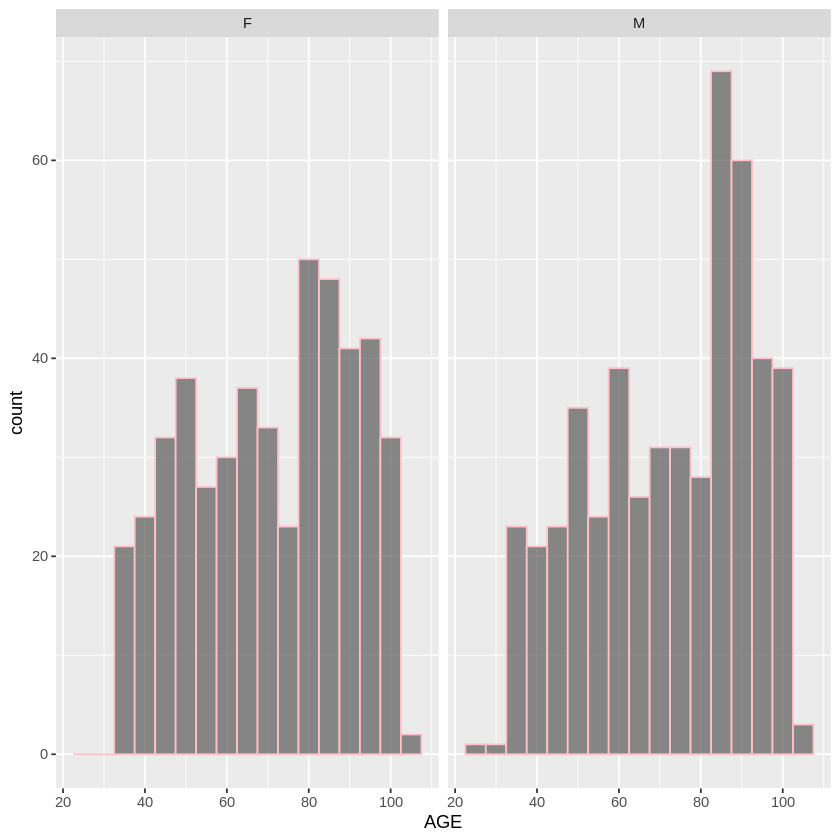

In [119]:
cleaned_data <- cleaned_data %>%
  mutate(AGE = as.integer(
  if_else(
    !is.na(DEATHDATE),
    floor(interval(BIRTHDATE, DEATHDATE) / years(1)),
    floor(interval(BIRTHDATE, Sys.Date()) / years(1))
  )
  ))

  ggplot(cleaned_data, aes(x= AGE)) +
    geom_histogram(binwidth = 5, color = "pink", alpha = 0.7) +
      facet_wrap(~GENDER)

### Question 12
Make a scatterplot of birthdate by martial status.

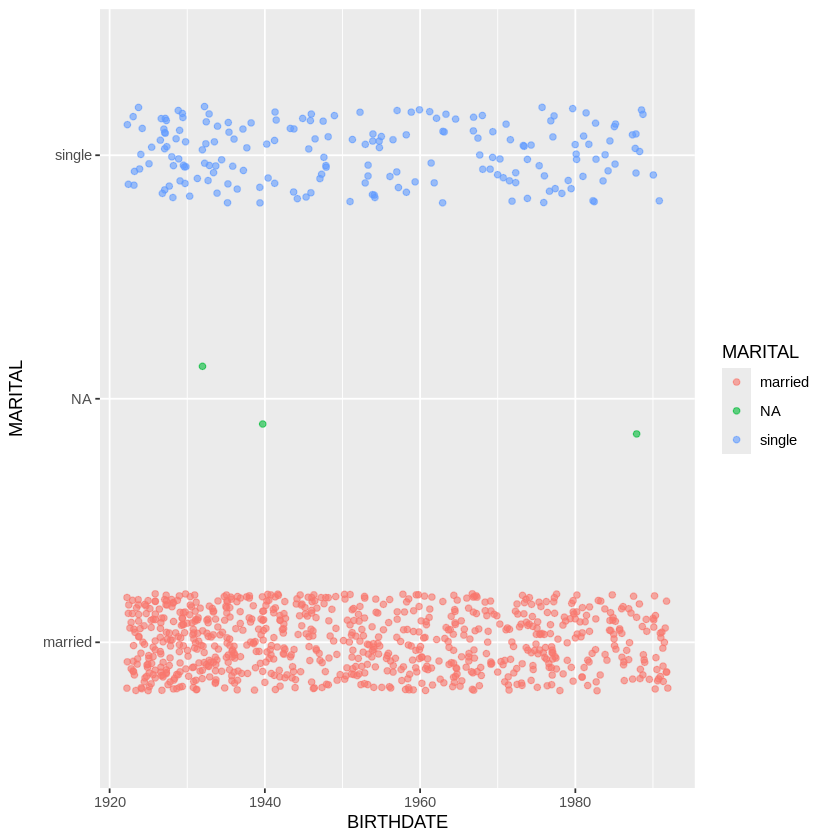

In [120]:
ggplot(cleaned_data, aes(x = BIRTHDATE, y = MARITAL, color = MARITAL)) +
  geom_jitter(alpha = 0.6, width = 0.2, height = 0.2)